Project Description – Image classification using CNNs in Keras


Data Description:
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

```
`# This is formatted as code`
```



Steps and tasks:
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import cv2
from google.colab.patches import cv2_imshow  

import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
# Mounting Google drive so dataset can be accessed (The dataset files are inside google drive.)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading Data
data = pd.read_csv('/content/drive/My Drive/Labels.csv') 
data.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [5]:
images = np.load('/content/drive/My Drive/images.npy')
images[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

In [6]:
# Shape of Data
data.shape

(4750, 1)

In [7]:
images.shape

(4750, 128, 128, 3)

In [8]:
#Visualizing one example of each species

In [9]:
data.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

Species: Small-flowered Cranesbill


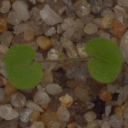

In [10]:
print("Species: {}".format(data.Label[0]))
cv2_imshow(images[0])

Species: Fat Hen


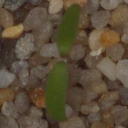

In [11]:
print("Species: {}".format(data.Label[496]))
cv2_imshow(images[496])

Species: Shepherds Purse


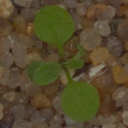

In [12]:
print("Species: {}".format(data.Label[971]))
cv2_imshow(images[971])

Species: Common wheat


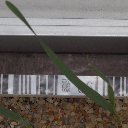

In [13]:
print("Species: {}".format(data.Label[1202]))
cv2_imshow(images[1202])

Species: Common Chickweed


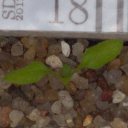

In [14]:
print("Species: {}".format(data.Label[1423]))
cv2_imshow(images[1423])

Species: Charlock


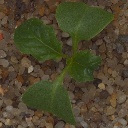

In [15]:
print("Species: {}".format(data.Label[2034]))
cv2_imshow(images[2034])

Species: Cleavers


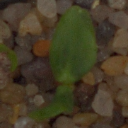

In [16]:
print("Species: {}".format(data.Label[2424]))
cv2_imshow(images[2424])

Species: Scentless Mayweed


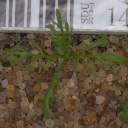

In [17]:
print("Species: {}".format(data.Label[2711]))
cv2_imshow(images[2711])

Species: Sugar beet


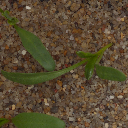

In [18]:
print("Species: {}".format(data.Label[3227]))
cv2_imshow(images[3227])

Species: Maize


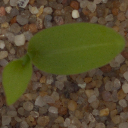

In [19]:
print("Species: {}".format(data.Label[3612]))
cv2_imshow(images[3612])

Species: Black-grass


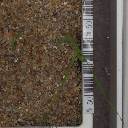

In [20]:
print("Species: {}".format(data.Label[3833]))
cv2_imshow(images[3833])

Species: Loose Silky-bent


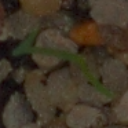

In [21]:
print("Species: {}".format(data.Label[4308]))
cv2_imshow(images[4308])

2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.



In [22]:
#Normalization
from numpy import asarray
pixels = asarray(images)
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
pixels = pixels.astype('float32')
pixels /= 255.0
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


In [23]:
pixels[4]

array([[[0.20784314, 0.2627451 , 0.3137255 ],
        [0.1882353 , 0.24313726, 0.29411766],
        [0.16862746, 0.21568628, 0.26666668],
        ...,
        [0.20392157, 0.30588236, 0.3764706 ],
        [0.1882353 , 0.28235295, 0.36078432],
        [0.16862746, 0.2627451 , 0.3372549 ]],

       [[0.2       , 0.25882354, 0.30980393],
        [0.18039216, 0.24313726, 0.28627452],
        [0.16862746, 0.22352941, 0.26666668],
        ...,
        [0.17254902, 0.27058825, 0.34901962],
        [0.1882353 , 0.28235295, 0.36078432],
        [0.16862746, 0.25882354, 0.32941177]],

       [[0.21568628, 0.26666668, 0.32156864],
        [0.1882353 , 0.24705882, 0.29411766],
        [0.1764706 , 0.23529412, 0.27450982],
        ...,
        [0.17254902, 0.25490198, 0.32941177],
        [0.12941177, 0.20392157, 0.2901961 ],
        [0.13333334, 0.21176471, 0.27450982]],

       ...,

       [[0.5372549 , 0.54901963, 0.5529412 ],
        [0.5176471 , 0.5294118 , 0.5372549 ],
        [0.49411765, 0

In [24]:
# Gaussian Blurring
new1 = np.empty((4750, 128, 128,3)) 
new2 = np.empty((4750, 128, 128,3)) 
new3 = np.empty((4750, 128, 128,3)) 
for i, img in enumerate(images):
  new1[i] = cv2.GaussianBlur(img, (5, 5), 0)
  new2[i] = cv2.GaussianBlur(img, (11, 11), 0)
  new3[i] = cv2.GaussianBlur(img, (15, 15), 0)

Original Image:



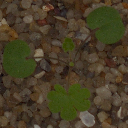


 Output after first gaussian blurring: 



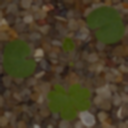


 Output after second gaussian blurring: 



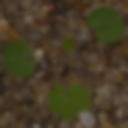


 Output after third gaussian blurring: 



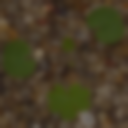

In [25]:
# Visualize after Pre-Processing : Example 1
print('Original Image:\n')
cv2_imshow(images[1])
print('\n Output after first gaussian blurring: \n')
cv2_imshow(new1[1])
print('\n Output after second gaussian blurring: \n')
cv2_imshow(new2[1])
print('\n Output after third gaussian blurring: \n')
cv2_imshow(new3[1])

Original Image:



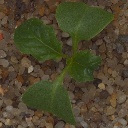


 Output after first gaussian blurring: 



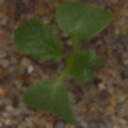


 Output after second gaussian blurring: 



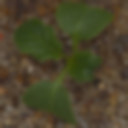


 Output after third gaussian blurring: 



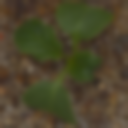

In [26]:
# Visualize after Pre-Processing : Example 2
print('Original Image:\n')
cv2_imshow(images[2034])
print('\n Output after first gaussian blurring: \n')
cv2_imshow(new1[2034])
print('\n Output after second gaussian blurring: \n')
cv2_imshow(new2[2034])
print('\n Output after third gaussian blurring: \n')
cv2_imshow(new3[2034])

In [27]:
# Gaussian Blurring Using Vectorized Operation
new = np.apply_along_axis(
    lambda img: cv2.GaussianBlur(img, (5, 5), 0), 
    -1, 
    images.reshape((-1, 128, 128))
)
new = new.reshape((-1, 128, 128))

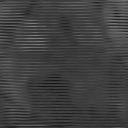

In [28]:
cv2_imshow(new[1])

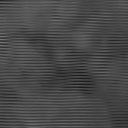

In [29]:
cv2_imshow(new[2034])

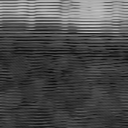

In [30]:
cv2_imshow(new[3612])

3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.


In [31]:
# One-hot Vectors
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
encdata = enc.fit_transform(data)

In [32]:
print("Species: {}".format(data.Label[0]))
print(encdata[0])
print('')
print("Species: {}".format(data.Label[496]))
print(encdata[496])
print('')
print("Species: {}".format(data.Label[971]))
print(encdata[971])
print('')
print("Species: {}".format(data.Label[1202]))
print(encdata[1202])
print('')
print("Species: {}".format(data.Label[1423]))
print(encdata[1423])
print('')
print("Species: {}".format(data.Label[2034]))
print(encdata[2034])
print('')
print("Species: {}".format(data.Label[2424]))
print(encdata[2424])
print('')
print("Species: {}".format(data.Label[2711]))
print(encdata[2711])
print('')
print("Species: {}".format(data.Label[3227]))
print(encdata[3227])
print('')
print("Species: {}".format(data.Label[3612]))
print(encdata[3612])
print('')
print("Species: {}".format(data.Label[3833]))
print(encdata[3833])
print('')
print("Species: {}".format(data.Label[4308]))
print(encdata[4308])

Species: Small-flowered Cranesbill
[0 0 0 0 0 0 0 0 0 0 1 0]

Species: Fat Hen
[0 0 0 0 0 1 0 0 0 0 0 0]

Species: Shepherds Purse
[0 0 0 0 0 0 0 0 0 1 0 0]

Species: Common wheat
[0 0 0 0 1 0 0 0 0 0 0 0]

Species: Common Chickweed
[0 0 0 1 0 0 0 0 0 0 0 0]

Species: Charlock
[0 1 0 0 0 0 0 0 0 0 0 0]

Species: Cleavers
[0 0 1 0 0 0 0 0 0 0 0 0]

Species: Scentless Mayweed
[0 0 0 0 0 0 0 0 1 0 0 0]

Species: Sugar beet
[0 0 0 0 0 0 0 0 0 0 0 1]

Species: Maize
[0 0 0 0 0 0 0 1 0 0 0 0]

Species: Black-grass
[1 0 0 0 0 0 0 0 0 0 0 0]

Species: Loose Silky-bent
[0 0 0 0 0 0 1 0 0 0 0 0]


In [33]:
encdata.shape

(4750, 12)

In [34]:
#Data split between train, test and validation sets:
from sklearn.model_selection import train_test_split
x = images
y = encdata
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size =0.5, random_state=2)

In [35]:
print(y_train[0])
print(y_test[0])
print(y_val[0])

[1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0]


In [36]:
# Checking shape of data
print(x.shape)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(4750, 128, 128, 3)
(3325, 128, 128, 3)
(713, 128, 128, 3)
(712, 128, 128, 3)


In [37]:
print(y.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4750, 12)
(3325, 12)
(713, 12)
(712, 12)


The shape of the data is already in compatible mode for our Keras models as Keras accepts volume data for CNN. Hence no need for reshaping.

4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)


Create the Model:<h1/>

- Convolutional input layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization Layer.
- Convolutional layer, 64 feature maps with a size of 5×5 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 30%.
---
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Dropout layer at 25%.
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Batch Normalization layer.
- Max Pool layer with size 2×2.
- Dropout layer at 50%.
---
- GlobalMaxPooling2D layer.
- Fully connected layer with 128 units and a rectifier activation function.
- Dropout layer at 50%.
- Fully connected output layer with 12 units (no. of classes) and a softmax activation function.

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [39]:
# Initiate Adam Optimizers
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [40]:
# Compilation using loss function
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [46]:
batch_size = 30
num_classes = 12
epoch = 40

In [47]:

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 15 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=15)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('PlantSpecies.{epoch:02d}-{val_loss:.4f}.hdf5', 
                                                          monitor="val_loss",
                                                          verbose=1,
                                                          save_best_only=True,
                                                          save_weights_only=True,
                                                          mode='auto',
                                                          save_freq="epoch",
                                    )

In [48]:
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_val = x_val.reshape(x_val.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(3325, 128, 128, 3)
(713, 128, 128, 3)
(712, 128, 128, 3)


5. Fit and evaluate model and print confusion matrix. (10 Marks)

Epoch 1/40
109/111 [============================>.] - ETA: 0s - loss: 0.6452 - accuracy: 0.7691
Epoch 00001: val_loss improved from inf to 0.91915, saving model to PlantSpecies.01-0.9191.hdf5
111/111 [==============================] - 3s 25ms/step - loss: 0.6511 - accuracy: 0.7666 - val_loss: 0.9191 - val_accuracy: 0.7237
Epoch 2/40
109/111 [============================>.] - ETA: 0s - loss: 0.6373 - accuracy: 0.7761
Epoch 00002: val_loss did not improve from 0.91915
111/111 [==============================] - 3s 25ms/step - loss: 0.6386 - accuracy: 0.7762 - val_loss: 1.2132 - val_accuracy: 0.5638
Epoch 3/40
111/111 [==============================] - ETA: 0s - loss: 0.6125 - accuracy: 0.7829
Epoch 00003: val_loss did not improve from 0.91915
111/111 [==============================] - 3s 25ms/step - loss: 0.6125 - accuracy: 0.7829 - val_loss: 1.3185 - val_accuracy: 0.5302
Epoch 4/40
111/111 [==============================] - ETA: 0s - loss: 0.5999 - accuracy: 0.7916
Epoch 00004: val_loss 

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

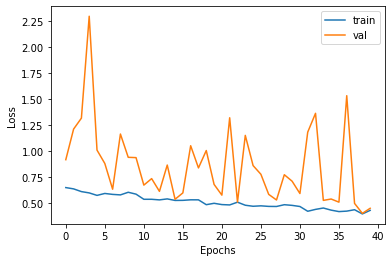

In [49]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

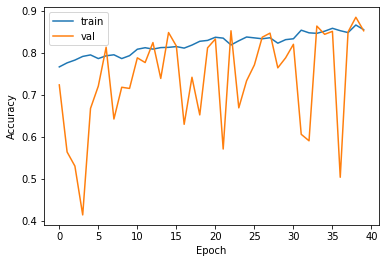

In [50]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
scores = model.evaluate(x_train, y_train, verbose=1)
print('Train loss:', scores[0])
print('Train accuracy:', scores[1])

104/104 [==============================] - 1s 9ms/step - loss: 0.3288 - accuracy: 0.8962
Train loss: 0.3287545144557953
Train accuracy: 0.8962405920028687


In [52]:
scores = model.evaluate(x_val, y_val, verbose=1)
print('Val loss:', scores[0])
print('Val accuracy:', scores[1])

23/23 [==============================] - 0s 10ms/step - loss: 0.4521 - accuracy: 0.8527
Val loss: 0.452088862657547
Val accuracy: 0.8527349233627319


In [53]:
y_pred = model.predict(x_val)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_pred.argmax(axis=1), y_val.argmax(axis=1))
print(cm)

[[27  0  0  0  1  0 18  0  0  0  0  0]
 [ 0 52  2  0  0  0  0  0 14  2  0  0]
 [ 0  1 40  0  2  0  0  0  0  0  0  1]
 [ 1  0  2 97  0  0  2  0  3  1  0  1]
 [ 3  0  0  0 21  1  0  0  0  0  0  0]
 [ 4  1  0  0  1 70  0  3  1  0  0  2]
 [ 8  0  1  0  1  0 70  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 56  2  0  0]
 [ 0  0  0  1  0  0  0  0 11 19  0  0]
 [ 0  0  0  0  0  2  0  0  3  1 72  0]
 [ 1  0  0  0  0  0  0  1  4  0  0 56]]


In [55]:
print("=== Classification Report ===")
print(classification_report(y_pred.argmax(axis=1), y_val.argmax(axis=1)))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.60      0.59      0.59        46
           1       0.96      0.74      0.84        70
           2       0.89      0.91      0.90        44
           3       0.99      0.91      0.95       107
           4       0.81      0.84      0.82        25
           5       0.96      0.85      0.90        82
           6       0.78      0.86      0.82        81
           7       0.88      1.00      0.93        28
           8       0.60      0.95      0.74        59
           9       0.76      0.61      0.68        31
          10       1.00      0.92      0.96        78
          11       0.93      0.90      0.92        62

    accuracy                           0.85       713
   macro avg       0.85      0.84      0.84       713
weighted avg       0.87      0.85      0.86       713



<Figure size 720x504 with 0 Axes>

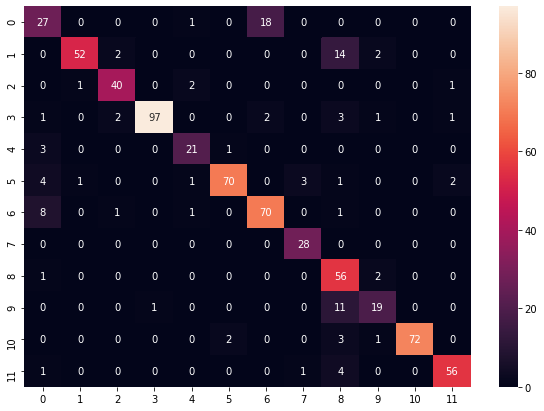

In [56]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [57]:
y_predt = model.predict(x_test)

In [58]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 7ms/step - loss: 0.3875 - accuracy: 0.8638
Test loss: 0.3874974250793457
Test accuracy: 0.8637640476226807


In [59]:

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_predt.argmax(axis=1), y_test.argmax(axis=1))
print(cm)

[[26  0  0  0  1  0 20  0  0  0  0  0]
 [ 0 55  5  0  0  0  0  3  7  3  0  0]
 [ 0  0 39  0  6  0  0  0  0  0  0  0]
 [ 0  0  0 85  1  0  1  0  1  1  0  0]
 [ 2  0  0  0 31  0  0  0  0  0  0  0]
 [ 2  0  0  0  5 73  2  0  0  1  0  2]
 [ 4  0  0  0  0  0 72  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 29  1  0  0  1]
 [ 0  0  0  0  0  0  0  0 42  2  0  0]
 [ 0  0  0  3  0  0  0  0  8 32  0  0]
 [ 0  0  2  0  0  1  0  0  5  0 72  0]
 [ 1  0  0  1  1  0  1  0  2  0  0 59]]


In [60]:
print("=== Classification Report ===")
print(classification_report(y_predt.argmax(axis=1), y_test.argmax(axis=1)))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.74      0.55      0.63        47
           1       1.00      0.75      0.86        73
           2       0.85      0.87      0.86        45
           3       0.96      0.96      0.96        89
           4       0.69      0.94      0.79        33
           5       0.99      0.86      0.92        85
           6       0.75      0.94      0.83        77
           7       0.91      0.94      0.92        31
           8       0.63      0.95      0.76        44
           9       0.82      0.74      0.78        43
          10       1.00      0.90      0.95        80
          11       0.95      0.91      0.93        65

    accuracy                           0.86       712
   macro avg       0.86      0.86      0.85       712
weighted avg       0.88      0.86      0.87       712



Our model shows 86% accuracy for testing data as well.

```
# This is formatted as code
```



In [61]:
y_predt = enc.inverse_transform(y_predt)

In [62]:
y_test = enc.inverse_transform(y_test)

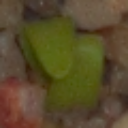

Actual Label: Sugar beet
Predicted Label: Maize


In [63]:
i =2
cv2_imshow(x_test[i])
print("Actual Label:", y_test[i])
print("Predicted Label:", y_predt[i])

In [64]:
result = pd.DataFrame({'Image' : ['x_test:{}'.format(i)], 'Actual Label' : [y_test[i]],'Predicted Label' : [y_predt[i]]})
result

,Image,Actual Label,Predicted Label
0,x_test:2,Sugar beet,Maize


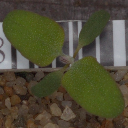

Actual Label: Fat Hen
Predicted Label: Fat Hen


In [65]:
i =3
cv2_imshow(x_test[i])
print("Actual Label:", y_test[i])
print("Predicted Label:", y_predt[i])

In [66]:
result.loc[1] = ['x_test:{}'.format(i), y_test[i], y_predt[i]]
result

,Image,Actual Label,Predicted Label
0,x_test:2,Sugar beet,Maize
1,x_test:3,Fat Hen,Fat Hen


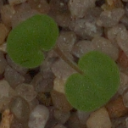

Actual Label: Small-flowered Cranesbill
Predicted Label: Small-flowered Cranesbill


In [67]:
i =33
cv2_imshow(x_test[i])
print("Actual Label:", y_test[i])
print("Predicted Label:", y_predt[i])

In [68]:
result.loc[2] = ['x_test:{}'.format(i), y_test[i], y_predt[i]]
result

,Image,Actual Label,Predicted Label
0,x_test:2,Sugar beet,Maize
1,x_test:3,Fat Hen,Fat Hen
2,x_test:33,Small-flowered Cranesbill,Small-flowered Cranesbill


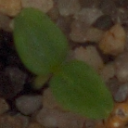

Actual Label: Cleavers
Predicted Label: Cleavers


In [69]:
i =36
cv2_imshow(x_test[i])
print("Actual Label:", y_test[i])
print("Predicted Label:", y_predt[i])

In [70]:
result.loc[3] = ['x_test:{}'.format(i), y_test[i], y_predt[i]]
result

,Image,Actual Label,Predicted Label
0,x_test:2,Sugar beet,Maize
1,x_test:3,Fat Hen,Fat Hen
2,x_test:33,Small-flowered Cranesbill,Small-flowered Cranesbill
3,x_test:36,Cleavers,Cleavers


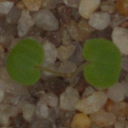

Actual Label: Small-flowered Cranesbill
Predicted Label: Small-flowered Cranesbill


In [71]:
i =59
cv2_imshow(x_test[i])
print("Actual Label:", y_test[i])
print("Predicted Label:", y_predt[i])

In [72]:
result.loc[4] = ['x_test:{}'.format(i), y_test[i], y_predt[i]]
result

,Image,Actual Label,Predicted Label
0,x_test:2,Sugar beet,Maize
1,x_test:3,Fat Hen,Fat Hen
2,x_test:33,Small-flowered Cranesbill,Small-flowered Cranesbill
3,x_test:36,Cleavers,Cleavers
4,x_test:59,Small-flowered Cranesbill,Small-flowered Cranesbill


Hence we have developed a model for predicting plant species with an accuracy of 85-86% that can be used for image classification.

In [ ]:
pip install nbconvert

In [ ]:
!jupyter nbconvert --to html ComputerVision_Image_Classification_Project_Astha.ipynb

GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-astha1992